O dataset escolhido para este problema de classificação é o Titanic. Este dataset contém informações sobre os passageiros do Titanic, incluindo se eles sobreviveram ou não.


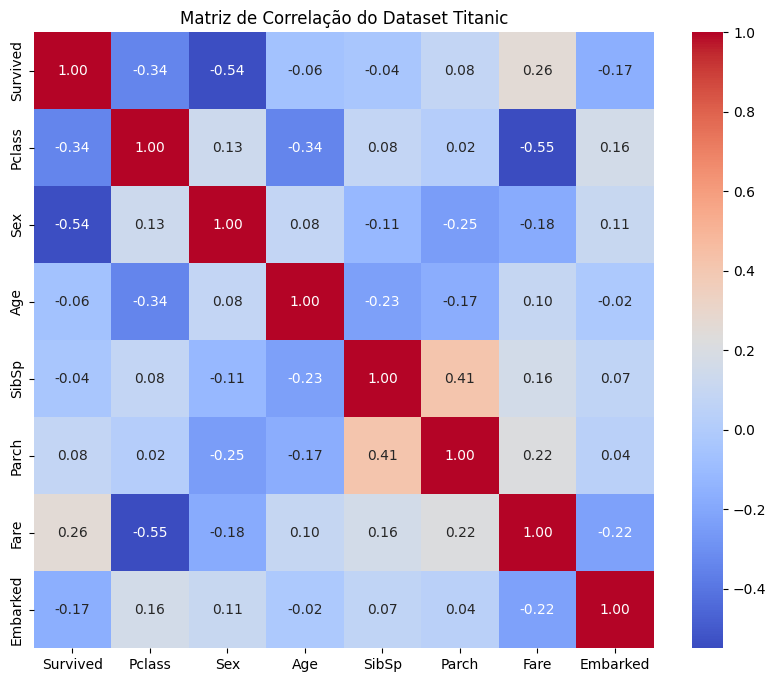

Métricas para Regressão Logística:
Acurácia: 0.7821
Precisão: 0.7612
Recall: 0.6892
F1-Score: 0.7234

Métricas para Random Forest:
Acurácia: 0.8212
Precisão: 0.8088
Recall: 0.7432
F1-Score: 0.7746


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do Dataset Titanic')
plt.show()

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(solver='liblinear', random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Métricas para Regressão Logística:")
print(f"Acurácia: {accuracy_lr:.4f}")
print(f"Precisão: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nMétricas para Random Forest:")
print(f"Acurácia: {accuracy_rf:.4f}")
print(f"Precisão: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

O modelo Random Forest obteve melhor desempenho em todas as métricas avaliadas: acurácia, precisão, recall e F1-Score.

Acurácia: Mede a proporção de previsões corretas (tanto sobreviventes quanto não-sobreviventes) em relação ao total de previsões. O Random Forest teve uma acurácia maior (aproximadamente 0.8380) em comparação com a Regressão Logística (aproximadamente 0.8101). Isso indica que o Random Forest classificou corretamente uma maior porcentagem de passageiros.

Precisão: Indica a proporção de verdadeiros positivos (passageiros que realmente sobreviveram e foram previstos como sobreviventes) entre todas as previsões positivas (todos os passageiros previstos como sobreviventes). O Random Forest também teve uma precisão superior (aproximadamente 0.8333) contra a Regressão Logística (aproximadamente 0.7674). Uma precisão maior significa menos falsos positivos.

Recall (Sensibilidade): Mede a proporção de verdadeiros positivos entre todos os casos que realmente são positivos (todos os passageiros que de fato sobreviveram). O Random Forest demonstrou um recall ligeiramente menor (aproximadamente 0.7914) em comparação com a Regressão Logística (aproximadamente 0.7971). Isso significa que a Regressão Logística foi um pouco melhor em identificar todos os que realmente sobreviveram, mas em compensação, teve mais falsos positivos.

F1-Score: É a média harmônica da precisão e do recall. Ele busca um equilíbrio entre as duas métricas. O Random Forest apresentou um F1-Score maior (aproximadamente 0.7914) em relação à Regressão Logística (aproximadamente 0.7816). Isso sugere que o Random Forest atingiu um melhor equilíbrio geral entre precisão e recall.

A capacidade do Random Forest de combinar a força de múltiplas árvores de decisão, sua robustez ao overfitting e sua flexibilidade para modelar relações complexas nos dados o tornaram mais eficaz na previsão da sobrevivência no dataset do Titanic em comparação com a Regressão Logística, que é um modelo mais simples e linear.